## 데이터 시각화

 - 데이터프레임에 나열된 숫자만 봐서는 쉽게 통찰이 어렵다.
 - 같은 데이터를 시계열이나 히트맵 그래프로 시각화하면 단순한 데이터 나열에
   비해 전체적인 추세(trend)나 효과적인 메시지를 전달할 수 있다.

### 1. 시계열 그래프 그리기
 - 앞에서 만든 월별, 국적별 관광객 데이터의 특징을 시각화를 통해서 살펴본다.
 - 엑셀로 저장한 데이터 불러온다.

In [1]:
import pandas as pd
df = pd.read_excel('../data3/kto_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


 - jupyter notebook의 그래프에서는 한글이 표현되지 않는다.
 - 사용중인 각 운영체제(윈도우, macOS)에 따라 한글을 지원하는 글꼴로  변경하는
   코드를 사용한다.

In [2]:
#그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 
 
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

#### matplotlib 활용
- matplotlib는 가장 기본적인 시각화 라이브러리 이다. seaborn등도 matplotlib을
  토대로 확장한 라이브러리인 만큼, matplotlib 파이썬에서 시각화에 필수적인
  라이브러리이다.
- 월별 중국인관광객 그래프를 그려본다. 

In [4]:
import matplotlib.pyplot as plt

#전체관광객 데이터중 중국관광객 수를 추출
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head(8)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
317,중국,87080,12375,293,3293,47078,150119,2010-06,아시아,58.0,16.7
377,중국,122432,10608,239,4309,57600,195188,2010-07,아시아,62.7,22.6
437,중국,142180,11049,232,26427,62099,241987,2010-08,아시아,58.8,24.5


#### 시계열 그래프 그리기

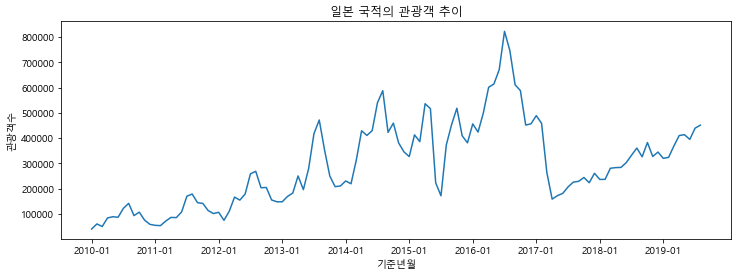

In [5]:
#그래프 크기 조정
plt.figure(figsize=(12,4))

#그래프 내용 설정
plt.plot(df_filter['기준년월'],df_filter['관광'])

#그래프 title, x축, y축 이름지정
plt.title('일본 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

#x축 눈금 값 설정
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

#그래프 표현하기
plt.show()

- 우리나라 방문하는 외국인 관광객 중 상위 5개 국가(중국, 일본, 대만, 미국, 홍콩)
  별로 시계열 그래프를 그린다.
- 상위 5개 국가의 리스트를 만들어 반복문으로 그래프를 그린다.

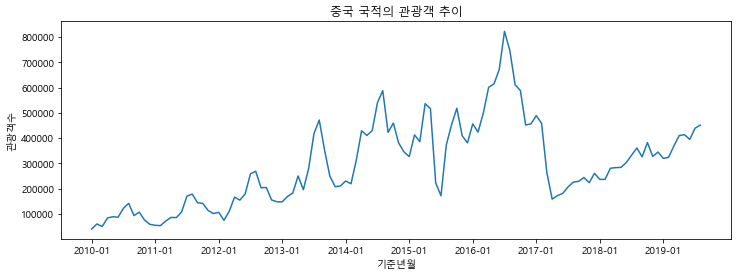

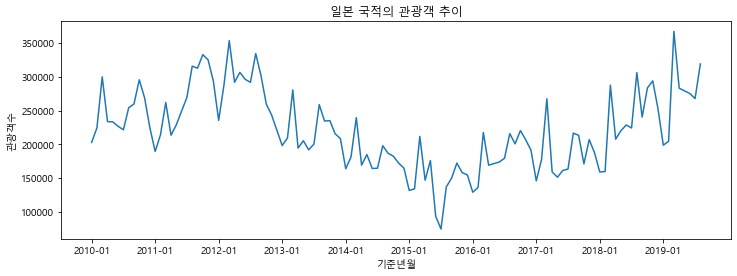

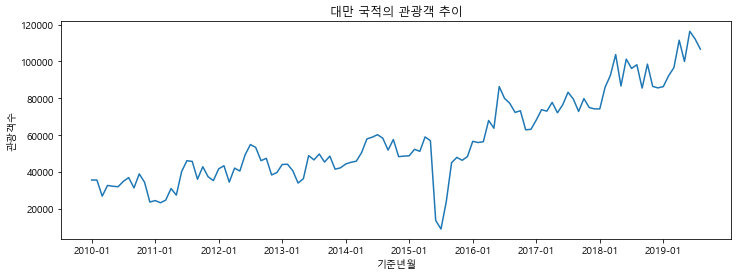

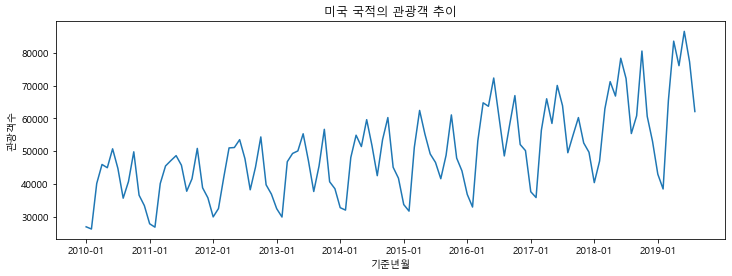

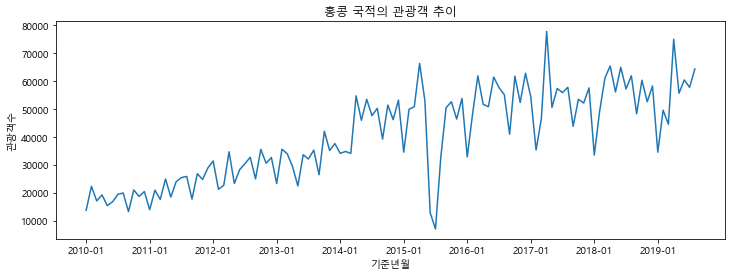

In [6]:
#우리나라 방문하는 외국인 관관객 top5 리스트 만들기 
country_list=['중국', '일본', '대만', '미국', '홍콩']

#반복문으로 여러 그래프그리기
for country in country_list:
    #국적 관광객만 추출하기
    condition=(df.국적 == country)
    df_filter = df[condition]

    #그래프 그리기
    plt.figure(figsize=(12,4))
    plt.plot(df_filter['기준년월'],df_filter['관광'])
    plt.title('{} 국적의 관광객 추이'.format(country))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
    
    #그래프 표현하기
    plt.show()

### 2. 히트맵 그래프 그리기

 - 히트맵 그래프는 매트릭스(matrix)형태에 포함된 각 값을 컬러로 표현하는 데이터 시각화
   방법으로 전체 데이터를 한눈에 파악할 수 있다는 장점이 있다.
 - 연도별 월별 관광객 수를 그래프에 표현하려면 합쳐있는 기준년월의 년과 월을 구분된
   변수로 만들어야 한다.
 - str.slice()함수를 문자형 값에서 원하는 부분만 추출할 수 있다.
   df['기준년월'].str.slice(0,4) 로하면 기준년월을 문자열로 변환하고 년도만(0,1,2,3) 선택한다.
 - 기준년도에서 연도와 월을 분리하고 우선 중국관광객 필터링을 한다.

In [7]:
df['년도'] = df['기준년월'].str.slice(0,4) #2010
df['월'] = df['기준년월'].str.slice(5,7) #01
df.head(8)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01
5,말레이시아,3292,61,0,49,1157,4559,2010-01,아시아,72.2,0.8,2010,01
6,필리핀,3984,219,104,87,16820,21214,2010-01,아시아,18.8,1.0,2010,01
7,인도네시아,1840,327,3,65,2826,5061,2010-01,아시아,36.4,0.5,2010,01


In [8]:
condition = (df['국적'] == '중국')
df_filtered = df[condition]
df_filtered.head(8)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05
317,중국,87080,12375,293,3293,47078,150119,2010-06,아시아,58.0,16.7,2010,06
377,중국,122432,10608,239,4309,57600,195188,2010-07,아시아,62.7,22.6,2010,07
437,중국,142180,11049,232,26427,62099,241987,2010-08,아시아,58.8,24.5,2010,08


히트맵 그래프로 표현하고자 하는 형태의 데이터를 만든다.

pivot_table() 의 index에는 Y축 표현될 년도, columns에는 X축에 표현될 월을 입력하고, 표 내부를 의미하는 values에는 관광객 수를 넣는다.

In [9]:
df_pivot=df_filtered.pivot_table(values='관광', index='년도', columns='월')
df_pivot.head(10)

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0,107237.0,75686.0,58987.0
2011,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0,141824.0,113856.0,101605.0
2012,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0,204866.0,155503.0,148320.0
2013,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0,249850.0,208175.0,210950.0
2014,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0,459708.0,381118.0,345957.0
2015,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0,518651.0,409635.0,381722.0
2016,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0,588561.0,452082.0,456882.0
2017,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0,244541.0,223743.0,260983.0
2018,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0,382922.0,327664.0,345135.0


 - 히트맵은 seaborn 라이브러리를 통해서 나타낼 수 있다.
 - sns.heatmap()의 인자를 알아본다.
 - dt_pivot -> 히트맵그래프를 나타낼 데이터 지정
 - annot = True -> 히트맵 그래프에 각 칸에 실제 값을 표시한다.
 - fmt = '.0f' -> 숫자 형태를 소수점이 없는 실수형으로 표현한다.
 - cmap = 'rocket_r' -> 그래프의 색깔 조합을 지정한다.
   
   colormaps 참고 link:
   https://matplotlib.org/stable/tutorials/colors/colormaps.html

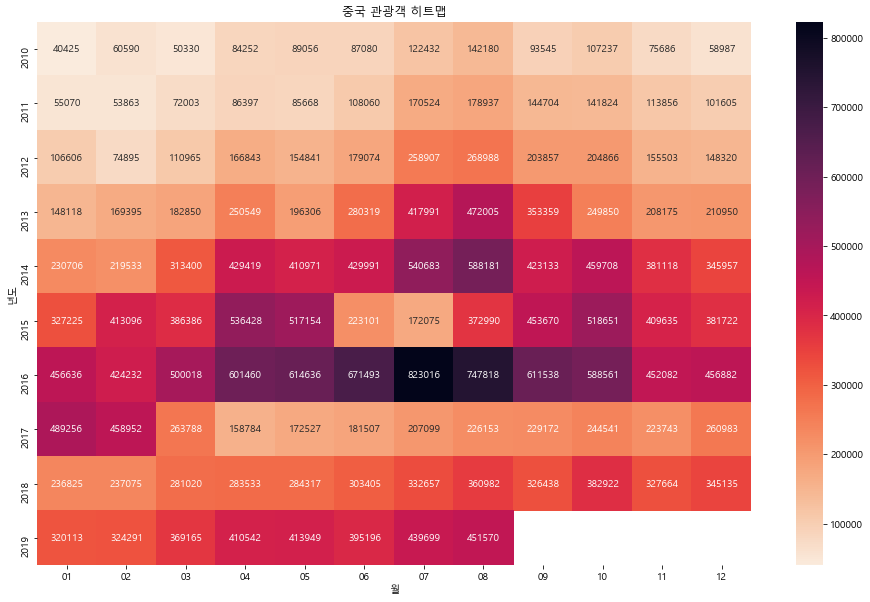

In [10]:
#히트맵 그래프 그리기에 필요한 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns

#히트맵 그래프 크기 설정
plt.figure(figsize=(16,10))

#히트맵 그리기
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')

#그래프 타이틀 달기
plt.title('중국 관광객 히트맵')

#그래프 표현
plt.show()

우리나라를 방문한 상위5개국에 대한 히트맵 그래프를 그린다. 

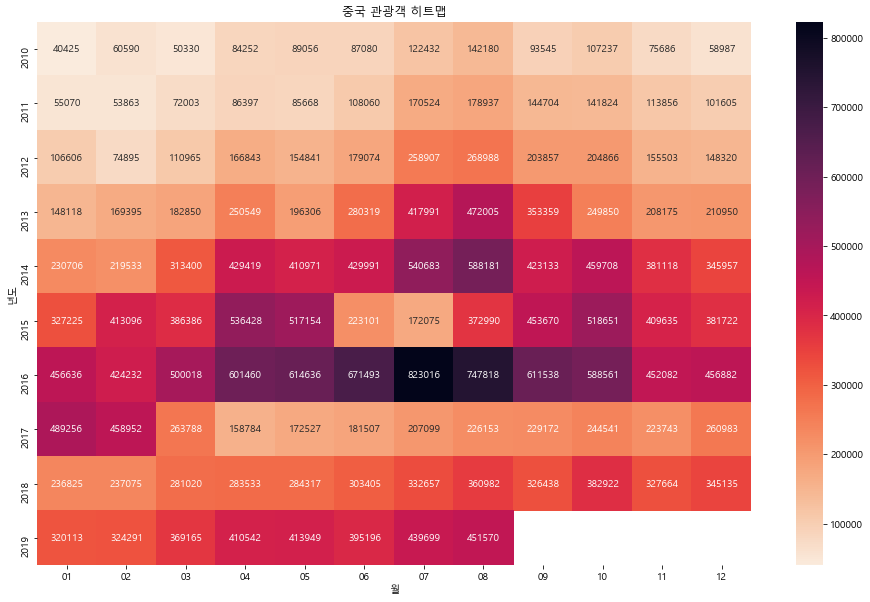

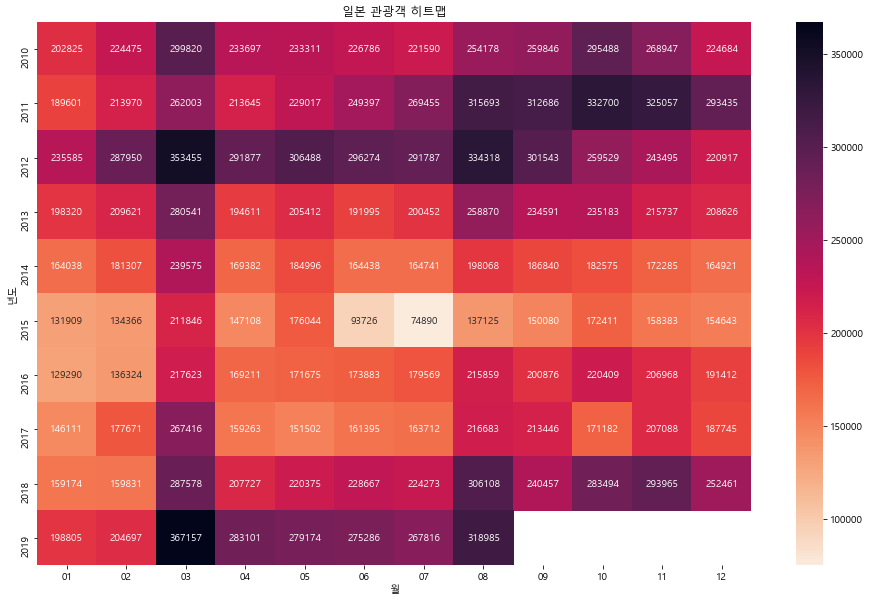

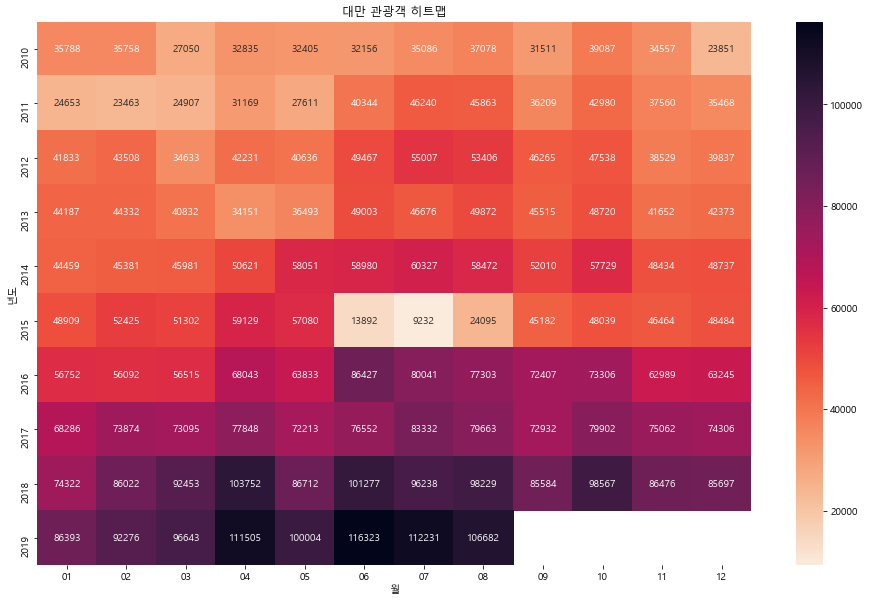

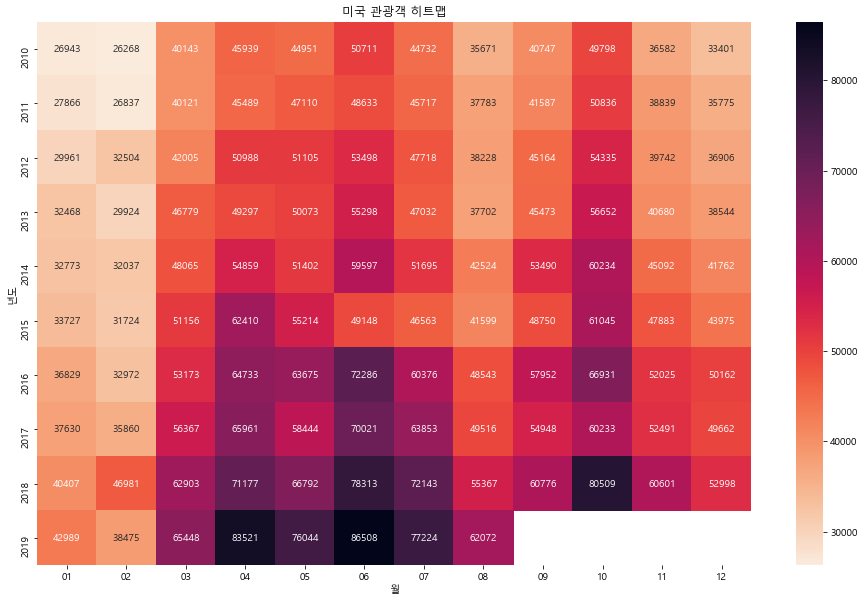

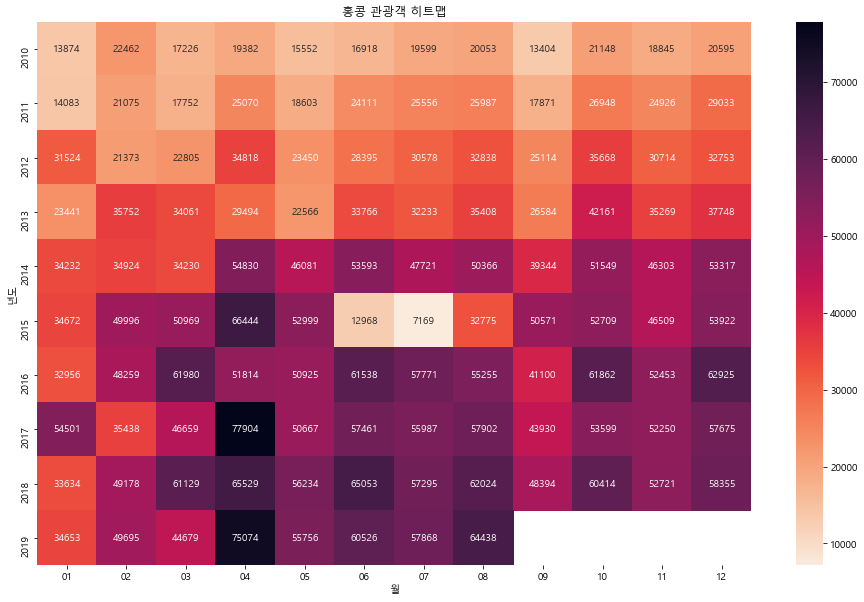

In [31]:
#반복문으로 top5 국가 히트맵 그래프 그리기
for country in country_list:
    condition = (df.국적 == country)
    df_filtered = df[condition]
    
    df_pivot = df_filtered.pivot_table(values='관광', index='년도', columns='월')
    
    plt.figure(figsize=(16,10))
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    plt.title('{} 관광객 히트맵'.format(country))
    
    plt.show()

### 시각화 해석
우리나라를 방문하는 외국 관광객의 대부분을 차지하는 국적은: 중국이다.

중국 관광객수의 시각화 결과를 기반으로: 
- 계절적인 패턴이 존재하는지(Seasonality)
- 추세(Trend)가 어떤지
- 큰 변화가 있었는지(Event)등을 확인한다.

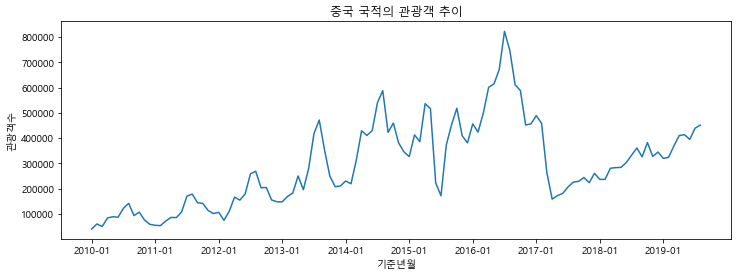

In [33]:
#시계열 그래프 다시 확인해보기
df_filter = df[(df.국적 == '중국')]

plt.figure(figsize=(12,4))
plt.plot(df_filter['기준년월'],df_filter['관광'])
plt.title('{} 국적의 관광객 추이'.format('중국'))
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])

plt.show()

중국 국적의 관광객 추이 시계열 그래프에서 보이는 특징은 다음과 같다:
 - (Trend) 2010년~ 2016년까지 관광객 수가 꾸준히 증가하는 추세
 - (Event) 2017년 초에 관광객 수가 큰 폭으로 감소
 - (Trend) 2017년 중순부터 관광객 수가 완만하게 증가하는 추세
 - (Seasonality) 매년 여름에 관광객 수가 최댓값을 가짐
 - (Event) 단, 2015년 여름에는 관광객 수가 큰 폭으로 감소

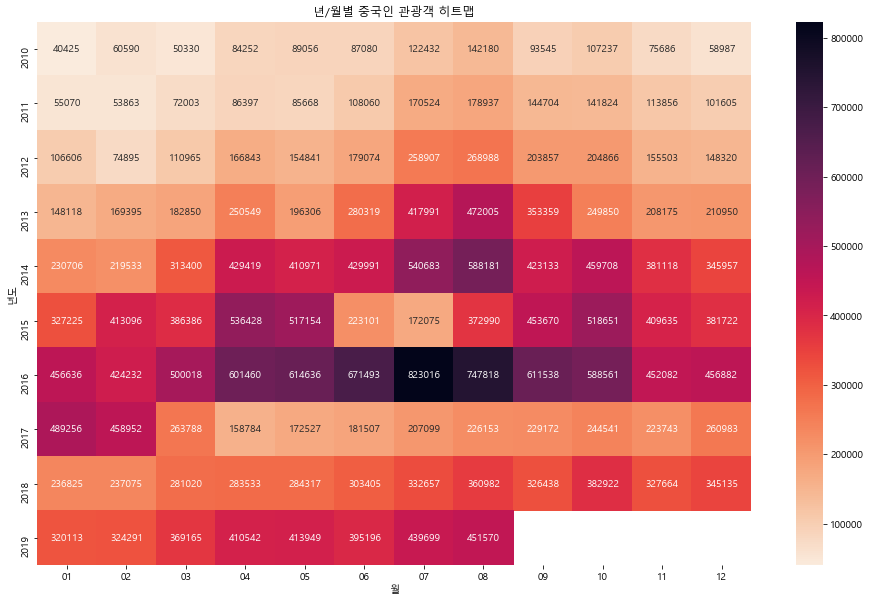

In [11]:
#히트맵 다시 확인해보기
plt.figure(figsize=(16,10))
sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
plt.title("년/월별 중국인 관광객 히트맵")
plt.show()

중국 관광객 히트맵 에서 보이는 특징은 다음과 같다.
 - (Trend) 2010년 1월~ 2017년 3월까지 색깔이 진해지는 것으로 보아
   관광객 수가 꾸준히 증가하는 추세
 - (Seasonality) 각 연도를 기준으로 봤을 때, 7~8월이 대체로 진한 색깔로서
   가장 관광객이 많이 방문하는 패턴이 보이며, 그다음으로 4, 10월 높은 패턴이
   나타남
 - (Event) 2015년 6월 ~ 8월에 관광객 수가 적음
 - (Event) 2017년 3월 ~ 6월까지 관광객수가 매우 적음
 - (Event) 2017년 7월 ~ 2019년 4월까지 관광객 수가 점차 많아짐

두 그래프 함께 해석:
 - 두 그래프를 보고 알 수있는 사실은 계절적 특징은 여름 > 봄,가을 >겨울 순으로
   많이 방문한다.
 - 트렌드로 중국인 관광객 숫자가 계속해서 증가하고 있다는 사실도 확인할 수 있다
 - 2015년 6월 ~ 8월에 관광객 수가 줄었다는것 '중국인 관광객' 키워드로 구굴링 한 결과로는  메르스 여파 때문이었다.
 - 2017년 3월에 중국인 관광객 숫자가 큰 폭으로 감소한 이유를 검색하니 이 기간에는
   중국의 사스 보복 조치로 인한 것임을 알 수 있다.